In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
source = pd.read_csv("input.csv")
source

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09


In [4]:
#careful when there are dates in the set, need to make it as datetime instead of string
source['join_date'] = pd.to_datetime(source['join_date']) 
source['quit_date'] = pd.to_datetime(source['quit_date']) 
source.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [127]:
source.describe(include='all')
#only quit_date has missing value
#note: some categorical features eg. 'seniority' 'company_id' do not have unique as they are in int64 instead of object

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24700.000000,24700.000000,24700,24700.000000,24700.000000,24700,13508
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501616.624899,3.426802,NaN,14.120972,138176.275304,NaN,NaN
std,288908.533280,2.699752,NaN,8.054137,76056.331953,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250165.250000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


In [104]:
#note: seniority is the number of yrs of work when hired -- < 65
#get rid of outlier
source = source[source['seniority'] < 65]

In [98]:
#categorical features:
print('number of company types:', source['company_id'].nunique())
print('number of dept types:', source['dept'].nunique())

number of company types: 12
number of dept types: 6


# Employee headcount

In [6]:
'''mission 1: create a table with 3 cols: date(from 2011/01/24 to 2015/12/13), company_id, emloyee headcount'''

#unique dates
date_list = pd.date_range(start='2011/01/24', end='2015/12/13')
#unique companies
company_list = list(source['company_id'].unique())

In [18]:
#create a new dataframe with all dates and 12 companies under each date
headcount_df = pd.DataFrame(columns=['Date','company_id'])
headcount_df['Date'] = np.repeat(date_list,len(company_list)) #repeat each date for 12 times
headcount_df['company_id'] = company_list * len(date_list) #the whole company list repeat for each date
headcount_df

,Date,company_id
0,2011-01-24,1
1,2011-01-24,2
2,2011-01-24,3
3,2011-01-24,4
4,2011-01-24,5
...,...,...
21415,2015-12-13,8
21416,2015-12-13,9
21417,2015-12-13,10
21418,2015-12-13,11


In [19]:
join = source.groupby(['join_date','company_id'], as_index=False).count()[['join_date','company_id','employee_id']]
quit = source.groupby(['quit_date','company_id'], as_index=False).count()[['quit_date','company_id','employee_id']]
headcount_df = headcount_df.merge(join, how='left', left_on=['Date','company_id'], right_on=['join_date','company_id'])
headcount_df = headcount_df.merge(quit, how='left', left_on=['Date','company_id'], right_on=['quit_date','company_id'])
headcount_df

,Date,company_id,join_date,employee_id_x,quit_date,employee_id_y
0,2011-01-24,1,2011-01-24,25.0,NaT,NaN
1,2011-01-24,2,2011-01-24,17.0,NaT,NaN
2,2011-01-24,3,2011-01-24,9.0,NaT,NaN
3,2011-01-24,4,2011-01-24,12.0,NaT,NaN
4,2011-01-24,5,2011-01-24,5.0,NaT,NaN
...,...,...,...,...,...,...
21415,2015-12-13,8,NaT,NaN,NaT,NaN
21416,2015-12-13,9,NaT,NaN,NaT,NaN
21417,2015-12-13,10,NaT,NaN,NaT,NaN
21418,2015-12-13,11,NaT,NaN,NaT,NaN


In [23]:
#has NaT and NaN as some dates doesn't have joiner/quitter -> fill with 0 
headcount_df = headcount_df.fillna(0)
headcount_df['net_join'] = headcount_df['employee_id_x'] - headcount_df['employee_id_y']
headcount_df['headcount'] = headcount_df.groupby(['company_id'])['net_join'].apply(lambda x: x.cumsum())
headcount_df = headcount_df[['Date','company_id','headcount']]
headcount_df

,Date,company_id,headcount
0,2011-01-24,1,25.0
1,2011-01-24,2,17.0
2,2011-01-24,3,9.0
3,2011-01-24,4,12.0
4,2011-01-24,5,5.0
...,...,...,...
21415,2015-12-13,8,468.0
21416,2015-12-13,9,432.0
21417,2015-12-13,10,385.0
21418,2015-12-13,11,4.0


# Main factors that drive employee churn

Possible factors:
Department, seniority, salary range, company

How to measure employee churn:
duration = join_date - quit_date

In [165]:
employment_df = source.dropna()  #missing data in quit_date = still in employment
employment_df['duration'] = employment_df['quit_date'] - employment_df['join_date']
employment_df['duration'] = employment_df['duration'].astype('timedelta64[D]') #be careful about date difference
employment_df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578.0
...,...,...,...,...,...,...,...,...
24690,785497.0,1,sales,24,218000.0,2011-02-01,2015-01-23,1452.0
24692,4881.0,1,data_science,28,249000.0,2012-02-27,2013-04-26,424.0
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1151.0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,372.0


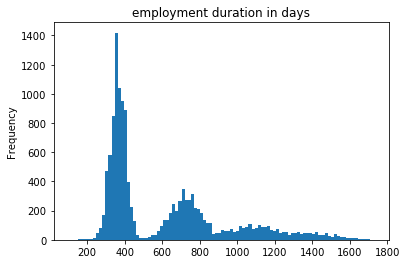

In [100]:
#first graph: frequency histogram of employement duration
employment_df['duration'].plot.hist(bins = 100, title = 'employment duration in days')

In [101]:
employment_df['duration'].mode() 

0    375.0
dtype: float64

## *Let's create a classification problem:*

Define early quitters to be people with employment duration <= mode 375 days

Features = [company_id, salary_range, dept, seniority]

Build classification model and plot feature importances 

In [39]:
threshold = 375 #change criteria by requirement

In [166]:
employment_df['early_quitter'] = np.where(employment_df['duration'] <= threshold, 1, 0)
employment_df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,early_quitter
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578.0,0
...,...,...,...,...,...,...,...,...,...
24690,785497.0,1,sales,24,218000.0,2011-02-01,2015-01-23,1452.0,0
24692,4881.0,1,data_science,28,249000.0,2012-02-27,2013-04-26,424.0,0
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1151.0,0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,372.0,1


In [131]:
#use binning in seniority and salary
seniority_bins = ['Junior','Medium','Senior']
# Junior: [(0.972, 10.333] < Medium: (10.333, 19.667] < Senior: (19.667, 29.0]]
employment_df['seniority_lvl'] = pd.cut(employment_df['seniority'], bins=3, labels=seniority_bins)
salary_bins = ['Low','Middle','High']
employment_df['salary_range'] = pd.cut(employment_df['salary'], bins=3, labels=salary_bins)
employment_df

,employee_id,company_id,dept,seniority,salary,...,quit_date,duration,early_quitter,seniority_lvl,salary_range
0,13021.0,7,customer_service,28,89000.0,...,2015-10-30,585.0,0,Senior,Low
1,825355.0,7,marketing,20,183000.0,...,2014-04-04,340.0,1,Senior,Middle
3,662910.0,7,customer_service,20,115000.0,...,2013-06-07,389.0,0,Senior,Low
4,256971.0,2,data_science,23,276000.0,...,2014-08-22,1040.0,0,Senior,High
5,509529.0,4,data_science,14,165000.0,...,2013-08-30,578.0,0,Medium,Middle
...,...,...,...,...,...,...,...,...,...,...,...
24690,785497.0,1,sales,24,218000.0,...,2015-01-23,1452.0,0,Senior,Middle
24692,4881.0,1,data_science,28,249000.0,...,2013-04-26,424.0,0,Senior,Middle
24695,63273.0,1,data_science,5,172000.0,...,2015-06-26,1151.0,0,Junior,Middle
24696,94644.0,6,marketing,7,88000.0,...,2013-02-01,372.0,1,Junior,Low


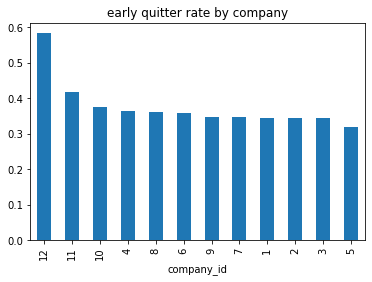

In [145]:
employment_df.groupby(['company_id']).mean()['early_quitter'].sort_values(ascending=False).plot(kind='bar', title='early quitter rate by company')

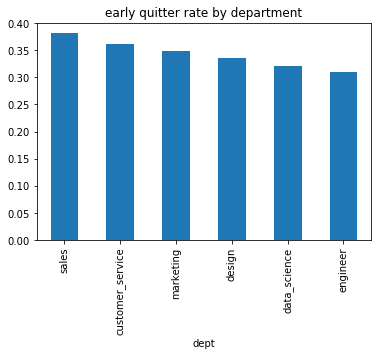

In [113]:
employment_df.groupby(['dept']).mean()['early_quitter'].sort_values(ascending=False).plot(kind='bar', title='early quitter rate by department')

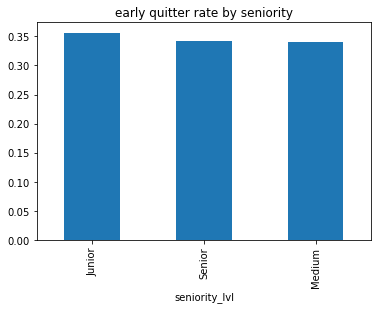

In [116]:
employment_df.groupby(['seniority_lvl']).mean()['early_quitter'].sort_values(ascending=False).plot(kind='bar', title='early quitter rate by seniority')

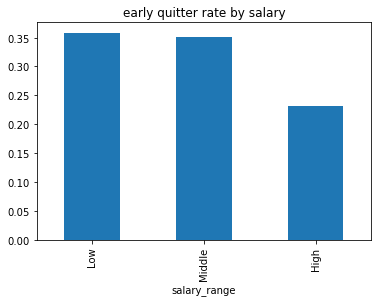

In [115]:
employment_df.groupby(['salary_range']).mean()['early_quitter'].plot(kind='bar', title='early quitter rate by salary')

### Summary:

1. Sale, customer services dept have higher early quitter rate than others

2. People with less work experience (junior level) are slightly more likely to be early quitter

3. People with high salary are less likely to be early quitter

4. Company 12 has much higher early quitter rate than the other firms

In [141]:
features = pd.get_dummies(employment_df[['company_id','dept','seniority_lvl','salary_range']])
features

,company_id,dept_customer_service,dept_data_science,dept_design,dept_engineer,...,seniority_lvl_Medium,seniority_lvl_Senior,salary_range_Low,salary_range_Middle,salary_range_High
0,7,1,0,0,0,...,0,1,1,0,0
1,7,0,0,0,0,...,0,1,0,1,0
3,7,1,0,0,0,...,0,1,1,0,0
4,2,0,1,0,0,...,0,1,0,0,1
5,4,0,1,0,0,...,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
24690,1,0,0,0,0,...,0,1,0,1,0
24692,1,0,1,0,0,...,0,1,0,1,0
24695,1,0,1,0,0,...,0,0,0,1,0
24696,6,0,0,0,0,...,0,0,1,0,0


In [118]:
targets = employment_df['early_quitter'].to_list()

In [119]:
#train/test split
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(features, targets, test_size=0.3, random_state=42)

In [142]:
#untuned xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf = XGBClassifier()
xgb_clf.fit(x_tr,y_tr)
y_xgb = xgb_clf.predict(x_te)
print("XGB accuracy is:",accuracy_score(y_xgb, y_te))

[01:08:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy is: 0.6360720453984703


In [143]:
importances = pd.DataFrame({'feature': features.columns,'importance': np.round(xgb_cl.feature_importances_, 5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
salary_range_High,0.32341
seniority_lvl_Junior,0.08178
dept_data_science,0.08041
salary_range_Low,0.07830
dept_sales,0.07306
company_id,0.06811
seniority_lvl_Senior,0.06419
seniority_lvl_Medium,0.04700
dept_marketing,0.04569


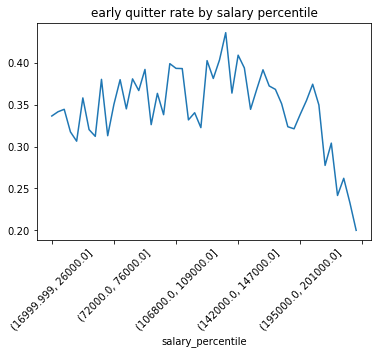

In [153]:
#in specific, how early quitter rate change in different salary range
employment_df['salary_percentile'] = pd.qcut(employment_df['salary'], q=50)
employment_df.groupby('salary_percentile')['early_quitter'].mean().plot(kind='line', rot=45, title="early quitter rate by salary percentile")
plt.show()

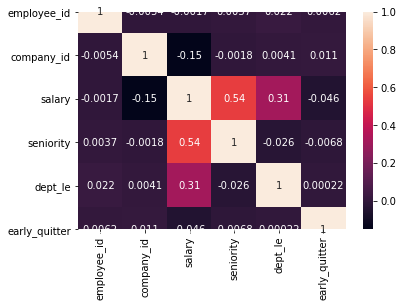

In [174]:
#heatmap to show feature correlation - seniority and salary are positively correlated
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(employment_df['dept'])
employment_df['dept_le']=le.fit_transform(employment_df['dept'])
sns.heatmap(employment_df[['employee_id', 'company_id','salary','seniority','dept_le','early_quitter']].corr(), annot=True)

# Conclusion

According to our model, salary is the most important factor deciding employee churn.

This finding makes sense as other features, such as seniority and dept, are correlated with salary

The early quitter rate is the lowest among employees who earn more than £195000 p.a. while the highest rate is for employees with medium range earning (106800, 109000). Underlying reasons could be lack of promotion, lack of personal development opportunity for mid-senior level employees etc.

Hence, other possible data to be considered are

1. salary offered in the next job for each employees who quit

2. number of promotions in employement tenure

3. work-life-balance rating 
